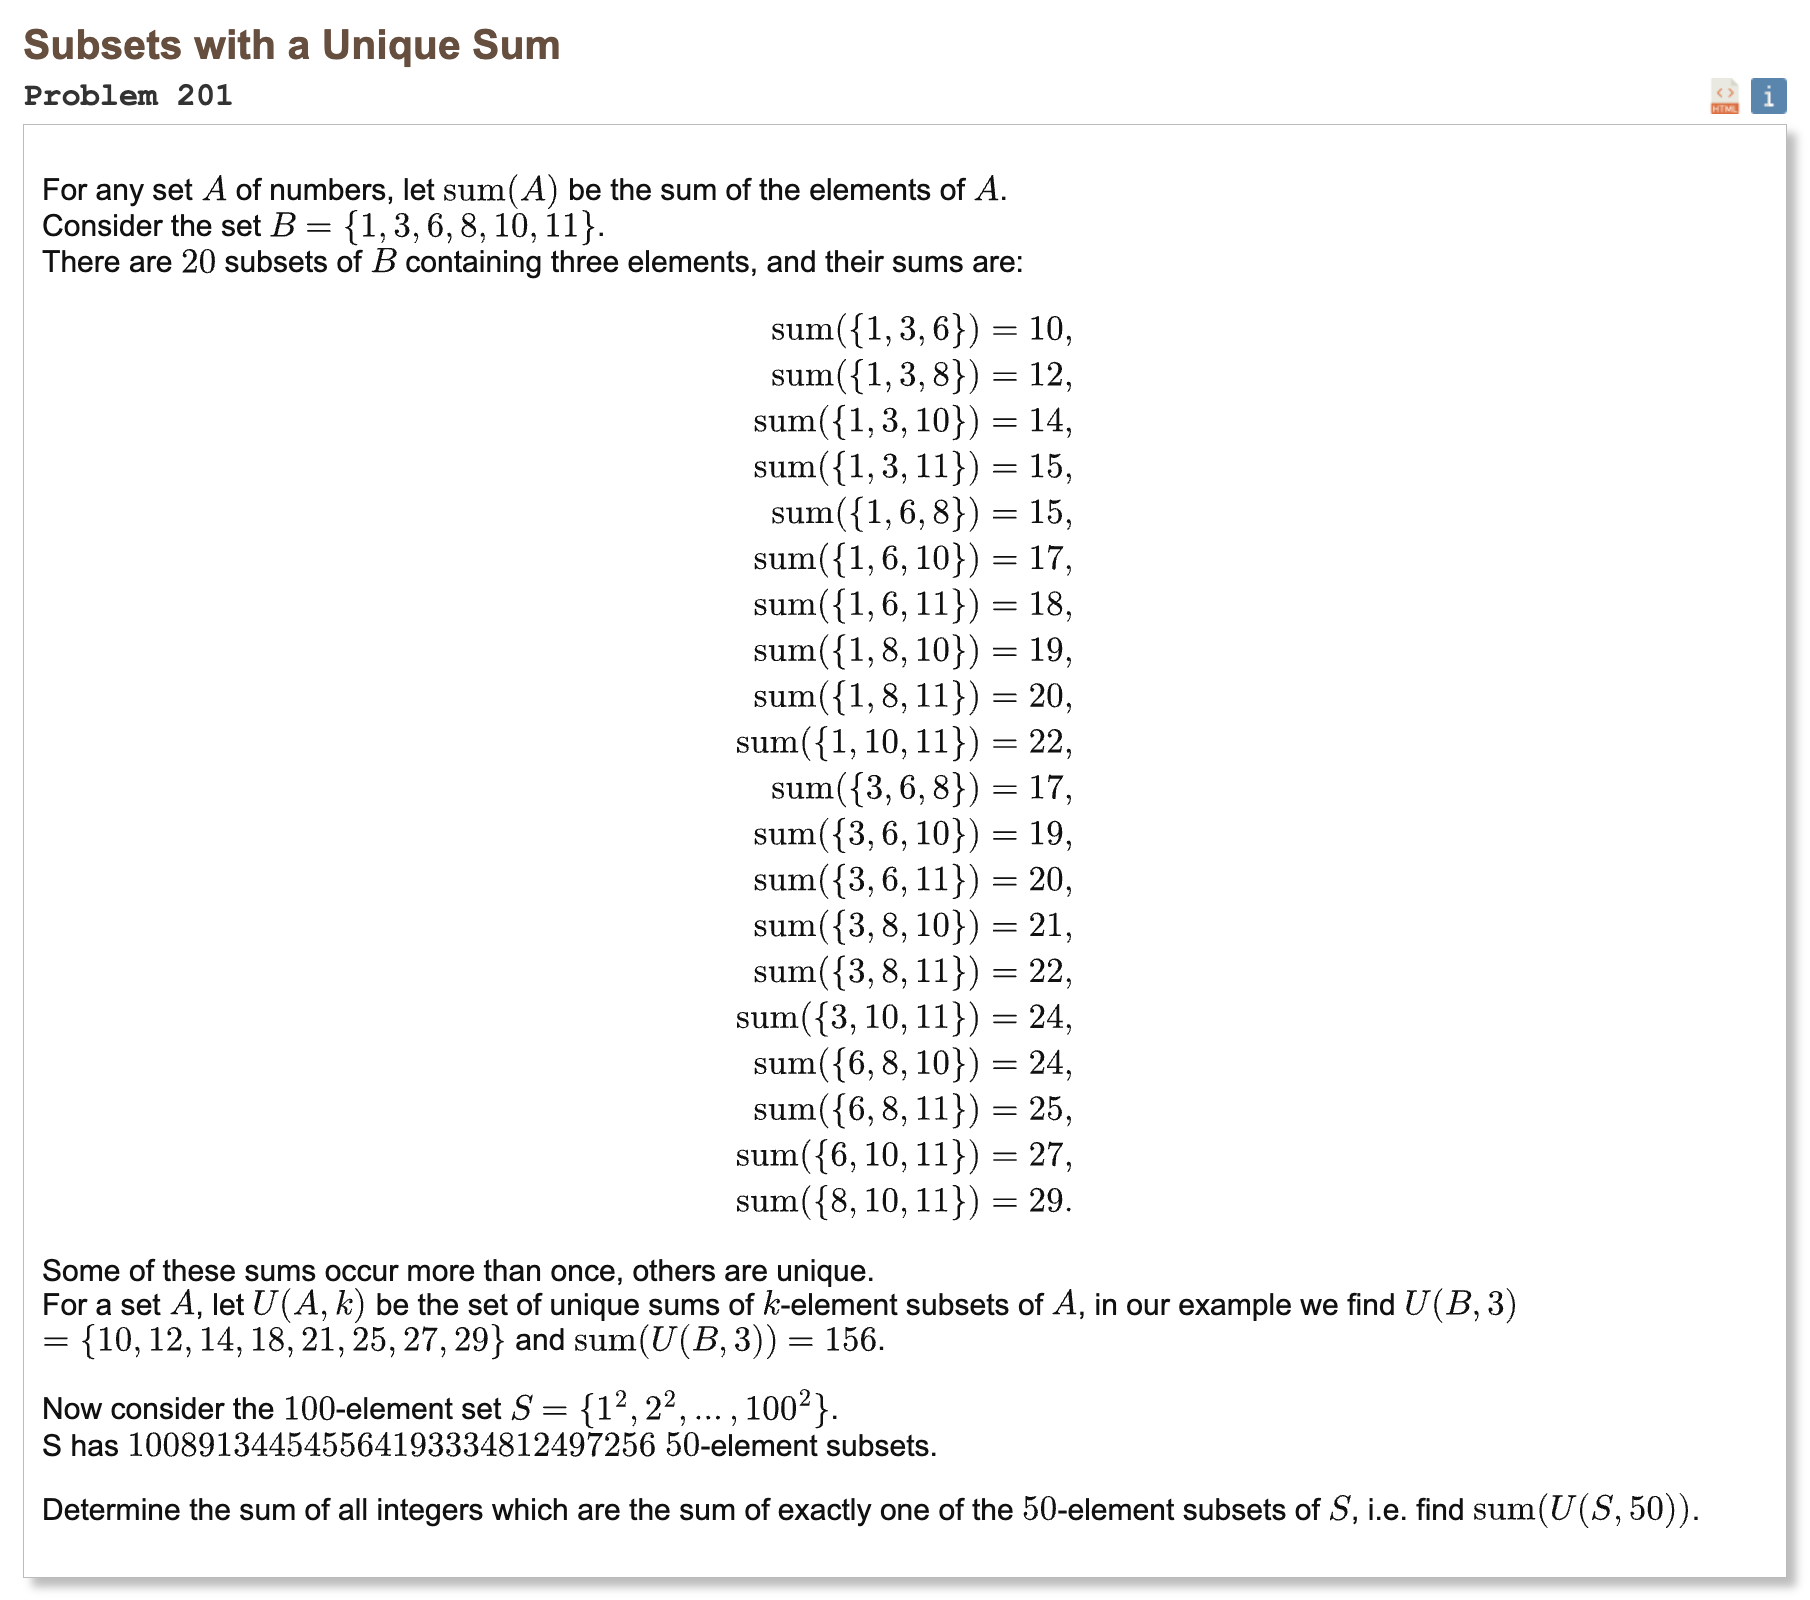

## Initial approach

* you need sums of 50-element subsets from the squares 1^2 to 100^2, and you only want sums that happen exactly once
* instead of generating all subsets (impossible), do dynamic programming over the numbers
* keep dp[k] as a map from sum to how many ways you can make that sum using exactly k elements
* you do not need exact large counts, only whether a sum is 0 ways, 1 way, or more than 1 way, so cap counts at 2
* for each square value, update k from 50 down to 1 so each number is used at most once per subset
* when you finish, dp[50] holds all sums for 50-element subsets with counts capped at 2
* add up every sum whose count is exactly 1, that total is the answer

In [1]:
def solve():
    squares = [i * i for i in range(1, 101)]
    k_target = 50

    dp = [dict() for _ in range(k_target + 1)]
    dp[0][0] = 1

    for v in squares:
        for k in range(k_target, 0, -1):
            prev = dp[k - 1]
            if not prev:
                continue
            cur = dp[k]
            for s, c in prev.items():
                ns = s + v
                old = cur.get(ns, 0)
                if old < 2:
                    newc = old + c
                    cur[ns] = 2 if newc > 2 else newc

    result = 0
    for s, c in dp[k_target].items():
        if c == 1:
            result += s

    return result

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 115039000
CPU times: user 9.76 s, sys: 135 ms, total: 9.9 s
Wall time: 9.91 s
